In [97]:
#read data
import pandas as pd
import numpy as np
train_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
train_X, train_Y  = train_data.iloc[:,1:-1], train_data.iloc[:,-1:]      #not including ID. Keep data in order for cooresponding Y
test_data = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")
test_X, test_Y  = test_data.iloc[:,1:], pd.read_csv("house-prices-advanced-regression-techniques/sample_submission.csv")['SalePrice']

print(train_X.columns)
print(train_Y.columns)
print(train_X.columns)
print(train_Y.columns)
print(f"train_X.shape[1] {train_X.shape[1]}, test_X.shape[1] {test_X.shape[1]}")
assert train_X.shape[1] == test_X.shape[1], print(f"train_X.shape[1] {train_X.shape[1]}, test_X.shape[1] {test_X.shape[1]}")
assert train_X.shape[0] == train_Y.shape[0] 
assert test_X.shape[0] == test_Y.shape[0] 


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [98]:
#clean data
print(f"train_X.shape[1] {train_X.shape[1]}, test_X.shape[1] {test_X.shape[1]}")
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

#first combine data, so that get_dummies will have all classes
all_data = pd.concat([train_X, test_X], axis=0)

all_data_dummy = pd.get_dummies(all_data)
all_data_dummy = all_data_dummy.fillna(0).astype(float).apply(normalize)

train_X = all_data_dummy.iloc[:train_X.shape[0]]
test_X =  all_data_dummy.iloc[train_X.shape[0]:]
#print(clear_data.columns)
print(test_X.isna().sum().sum())



assert train_X.shape[1] == test_X.shape[1], print(f"train_X.shape[1] {train_X.shape[1]}, test_X.shape[1] {test_X.shape[1]}")


train_X.shape[1] 79, test_X.shape[1] 79
0


In [99]:
from sklearn.neighbors import KNeighborsRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import time
warnings.filterwarnings('ignore')


def KNN(X_train, Y_train, X_val, Y_val, K):
  """
  K nearest neighbour algorithm
  """
  knn = KNeighborsRegressor(n_neighbors=K)
  knn.fit(X_train, Y_train)
  Y_pred = knn.predict(X_val)
  rmse = np.sqrt(np.mean((Y_pred-Y_val)**2))
  print("KNN Model Parameters:", knn.get_params())
  return rmse, Y_pred



def DNN(X_train, Y_train, X_val, Y_val, epoch, indimension):
  model = Sequential()
  model.add(Dense(256, activation='relu', input_shape=(indimension,)))  
  model.add(Dense(256, activation='relu'))  
  model.add(Dense(1))  
  model.compile(optimizer='adam', loss='mse')
  model.fit(X_train, Y_train, epochs=epoch, batch_size=32, verbose=0)
  Y_pred = model.predict(X_val)
  Y_pred = np.squeeze(Y_pred)
  rmse = np.sqrt(np.mean((Y_pred-Y_val)**2))
  print("DNN Model Parameters:", model.get_config())
  return rmse, Y_pred


def LR(X_train, Y_train, X_val, Y_val):
  regression = LinearRegression()
  regression.fit(X_train, Y_train)
  Y_pred = regression.predict(X_val)
  rmse = np.sqrt(np.mean((Y_pred-Y_val)**2))
  print("Intercept:", regression.intercept_)
  print("Coefficients:", regression.coef_)
  
  return rmse, Y_pred


def Forest(X_train, Y_train, X_val, Y_val, num):
  forest = RandomForestRegressor(n_estimators=num)
  forest.fit(X_train, Y_train)
  Y_pred = forest.predict(X_val)
  rmse = mean_squared_error(Y_val, Y_pred, squared=False)
  print("number of trees:", forest.n_estimators)
  print("max features:", forest.max_features)
  print("depth:", forest.max_depth)
  return rmse, Y_pred
  

In [100]:
# train_X = train_X.dropna().to_numpy()
# train_Y = train_Y.dropna().to_numpy()
# test_X = test_X.dropna().to_numpy()
# test_Y = test_Y.dropna().to_numpy()


In [101]:

train_X.to_csv("train_X.txt", sep="\t", index=False)
test_X.to_csv("test_X.txt", sep="\t", index=False)

In [102]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
train_Y = np.squeeze(train_Y)

(1460, 287)
(1460, 1)
(1459, 287)
(1459,)


KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
K=1, KNN: 75987.68065477347
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
K=2, KNN: 70480.048457487
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
K=4, KNN: 66907.12088251555
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
K=8, KNN: 64172.19612362494
KNN Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 16, 'p': 2, 'weights': 'uniform'}
K=16, KNN: 62365.393887394785
KNN 

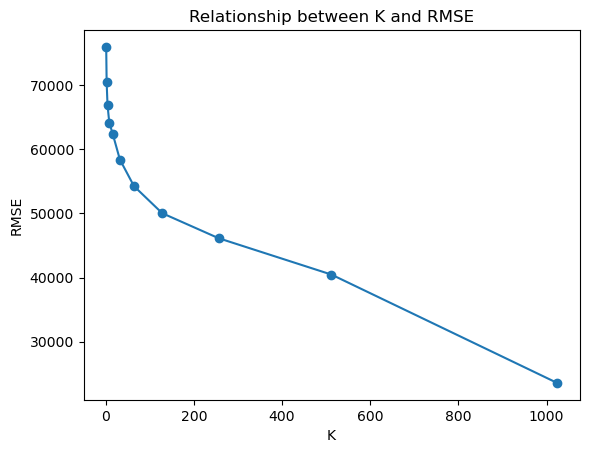

In [103]:
K_set = []
rmse_set = []
for K in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
  rmse_KNN, Y_pred_KNN = KNN(train_X, train_Y, test_X, test_Y, K)
  K_set.append(K)
  rmse_set.append(rmse_KNN)
  print(f"K={K}, KNN: {rmse_KNN}")
  
plt.plot(K_set, rmse_set, marker='o')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('Relationship between K and RMSE')
plt.show()

In [104]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(1460, 287)
(1460,)
(1459, 287)
(1459,)


46/46 [==============================] - 0s 7ms/step
DNN Model Parameters: {'name': 'sequential_17', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 287), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_51_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense_51', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 287), 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_52', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros',

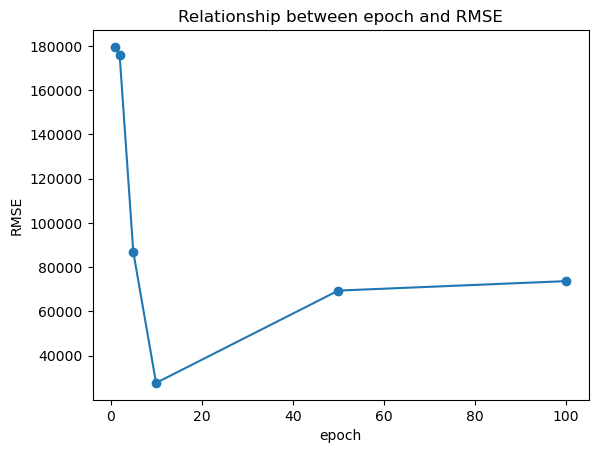

In [105]:
epoch_set = []
rmse_set = []
indimension = train_X.shape[1]
for epoch in [1, 2, 5, 10, 50, 100]:
  rmse_DNN, Y_pred_DNN = DNN(train_X, train_Y, test_X, test_Y, epoch, indimension)
  print(f"epoch:{epoch}, DNN: {rmse_DNN}")
  epoch_set.append(epoch)
  rmse_set.append(rmse_DNN)
  
plt.plot(epoch_set, rmse_set, marker='o')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.title('Relationship between epoch and RMSE')
plt.show()

number of trees: 1
max features: 1.0
depth: None
n_estimators:1, rmse: 75230.7647403913
number of trees: 2
max features: 1.0
depth: None
n_estimators:2, rmse: 73106.80448920291
number of trees: 5
max features: 1.0
depth: None
n_estimators:5, rmse: 71283.36733980938
number of trees: 10
max features: 1.0
depth: None
n_estimators:10, rmse: 70808.32181826652
number of trees: 50
max features: 1.0
depth: None
n_estimators:50, rmse: 70522.97065281236
number of trees: 100
max features: 1.0
depth: None
n_estimators:100, rmse: 70169.7177805519
number of trees: 1000
max features: 1.0
depth: None
n_estimators:1000, rmse: 70052.5560947131


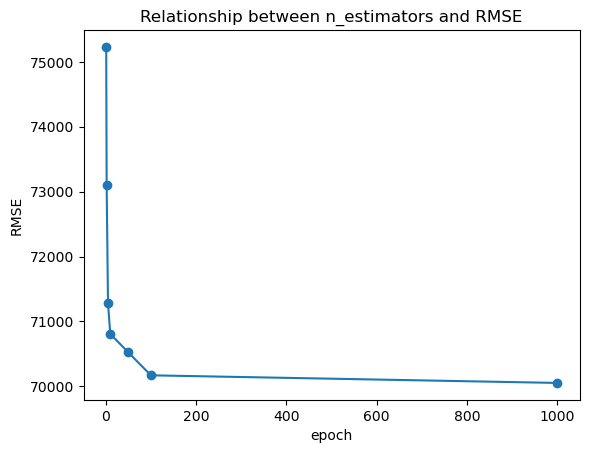

In [111]:
n_estimators_set = []
rmse_set = []
for n_estimators in [1, 2, 5, 10, 50, 100, 1000]:
  rmse_forest, Y_pred_forest = Forest(train_X, train_Y, test_X, test_Y,  n_estimators)
  print(f"n_estimators:{n_estimators}, rmse: {rmse_forest}")
  n_estimators_set.append(n_estimators)
  rmse_set.append(rmse_forest)
  
plt.plot(n_estimators_set, rmse_set, marker='o')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.title('Relationship between n_estimators and RMSE')
plt.show()

In [106]:
# Sets device to "cuda" if a GPU is available  (in Colabs, enable GPU by Edit->Notebook Settings-->Hardware Accelerator=GPU)
device = "cuda" if torch.cuda.is_available() else 'cpu'
print(device) # make sure you're using GPU instance


cuda


In [107]:
from torch import nn
import torch
def evaluate_MLP(mlp, loader):
  ''' Computes loss and error rate given your mlp model and data loader'''
  N = 0
  acc = 0
  loss = 0
  loss_function = torch.nn.CrossEntropyLoss()
  with torch.set_grad_enabled(False):
    for i, data in enumerate(loader, 0):

      # Get inputs
      inputs, targets = data
      N += len(targets)

      # Perform forward pass
      outputs = mlp(inputs.to(device))

      # Compute sum of correct labels
      y_pred = np.argmax(outputs.cpu().numpy(), axis=1)
      y_gt = np.argmax(targets.cpu().numpy(), axis=1)
      acc += np.sum(y_pred==y_gt)

      # Compute loss
      loss += loss_function(outputs, targets.to(device)).item()*len(targets)

  loss /= N
  acc /= N

  return loss, 1-acc, y_pred

# This is a possible function definition for training MLP, but feel free to change it
# You may also want to create helper functions, e.g. for computing loss or prediction
def train_MLP_mnist_part4(mlp, train_loader, lr=1e-1, num_epochs=100):
# def train_MLP_mnist_part4(mlp, train_loader, val_loader, lr=1e-1, num_epochs=100):
  '''
  Train a MLP
  Input: train_loader and val_loader are dataloaders for the training and
  val data, respectively. lr is the learning rate, and the network will
  be trained for num_epochs epochs.
  Output: return a trained MLP
  '''
  # Train the model, compute and store train/val loss at each epoch
  optimizer = torch.optim.AdamW(mlp.parameters(), lr=lr)
  loss_function = nn.CrossEntropyLoss()
  train_loss_list = []
  val_loss_list = []

  for epoch in range(num_epochs):
    # Iterate over the DataLoader for training data
    sum_train_loss = 0
    sum_val_loss = 0
    total_train_samples = 0
    total_val_samples = 0


    for inputs, targets in train_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad() # Zero the gradients
      outputs = mlp(inputs) # Compute logit scores for current batch
      train_loss = loss_function(outputs, targets) # Compute loss
      sum_train_loss += train_loss.item() * inputs.size(0)
      total_train_samples += inputs.size(0)
      #sum_train += train_loss.item()
      train_loss.backward() # Backprop loss
      optimizer.step() # Update weights
    # with torch.no_grad():
    #   for inputs, targets in val_loader:   
    #     inputs, targets = inputs.to(device), targets.to(device)
    #     outputs = mlp(inputs) # Compute logit scores for current batch
    #     val_loss = loss_function(outputs, targets) # Compute loss
    #     sum_val_loss += val_loss.item() * inputs.size(0)
    #     total_val_samples += inputs.size(0)

    mean_train_loss = sum_train_loss / total_train_samples
    # mean_val_loss = sum_val_loss / total_val_samples
    train_loss_list.append(mean_train_loss)
    # val_loss_list.append(mean_val_loss)

  # Display Loss Curves
  print(f"Learning rate = {lr}")
  # print(f"Model's min loss epoch index={val_loss_list.index(min(val_loss_list))}, and value {min(val_loss_list)}")
  display_error_curves(train_loss_list)
  return mlp

def display_error_curves(training_losses):
  """
  Plots the training and validation loss curves
  training_losses and validation_losses should be lists or arrays of the same length
  """
  num_epochs = len(training_losses)

  plt.plot(range(num_epochs), training_losses, label="Training Loss")

  # Add in a title and axes labels
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

  # Display the plot
  plt.legend(loc='best')
  plt.show()

OrderedDict([('weight', tensor([[-0.0184, -0.0195, -0.0186,  ...,  0.0277,  0.0101, -0.0045],
        [ 0.0382, -0.0138,  0.0208,  ..., -0.0309,  0.0450,  0.0565],
        [-0.0489, -0.0404,  0.0164,  ..., -0.0049,  0.0068, -0.0565],
        ...,
        [ 0.0313, -0.0251,  0.0416,  ...,  0.0147,  0.0050, -0.0421],
        [ 0.0528,  0.0299,  0.0246,  ...,  0.0447,  0.0057, -0.0363],
        [-0.0133,  0.0514, -0.0394,  ..., -0.0150, -0.0374,  0.0434]],
       device='cuda:0')), ('bias', tensor([ 1.5840e-02,  3.9012e-02,  2.2297e-02, -3.3472e-02,  2.8299e-03,
        -5.1340e-02,  8.7833e-03, -5.7933e-02,  2.8024e-02, -5.1889e-02,
         5.5278e-04,  1.5671e-02,  1.9616e-02,  2.5532e-02,  3.5742e-02,
         2.8260e-02,  1.3320e-02,  4.5541e-02,  3.2422e-02,  2.8062e-02,
         3.4173e-02, -8.9828e-04,  4.1065e-02,  4.4643e-02,  2.7220e-03,
         2.4493e-02, -4.4661e-02,  3.9018e-02, -3.1106e-02,  4.4985e-03,
        -2.2593e-02, -1.9797e-02,  3.7592e-02,  7.8552e-03,  3.8236e-

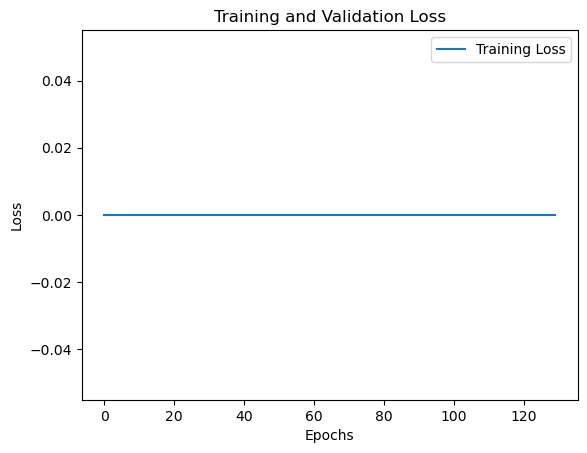

TypeError: 'generator' object is not subscriptable

In [115]:

#4 Strech goals
# 4.a Improve MNIST Classification Performance using MLPs
# TO DO (retrain if needed, and evaluate model on train, val, and test sets)
epochs = 130  

#testset = torch.utils.data.TensorDataset(torch.Tensor(x_test), torch.Tensor(np.eye(10)[y_test]))
#test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=1)
batch_size = 256  
input_size = 784
hidden_size = 512
output_size = 10


X=torch.tensor(train_X.to_numpy(), dtype=torch.float32).to(device)
Y=torch.tensor(train_Y.to_numpy(), dtype=torch.float32).reshape(-1,1).to(device)
#trainset = torch.utils.data.TensorDataset(torch.Tensor(x_train).to(device), torch.Tensor(np.eye(10)[y_train]).to(device))
# train_set = torch.utils.data.TensorDataset(torch.Tensor(train_X.to_numpy()), torch.Tensor(np.eye(train_Y.shape[0])[train_Y.to_numpy()]))
#train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=True)
train_loader = torch.utils.data.DataLoader(list(zip(X,Y)), batch_size=batch_size, shuffle=True, num_workers=0)

Xt=torch.tensor(test_X.to_numpy(), dtype=torch.float32).to(device)
Yt=torch.tensor(test_Y.to_numpy(), dtype=torch.float32).reshape(-1,1).to(device)
# test_set = torch.utils.data.TensorDataset(torch.Tensor(test_X.to_numpy()), torch.Tensor(np.eye(train_Y.shape[0])[test_Y.to_numpy()]))
test_loader = torch.utils.data.DataLoader(list(zip(Xt,Yt)), batch_size=2*batch_size, shuffle=True, num_workers=0)
# for inputs, targets in train_loader:
#     print(inputs)
#     print(targets)

# #trainset = torch.utils.data.TensorDataset(torch.Tensor(x_train).to(device), torch.Tensor(np.eye(10)[y_train]).to(device))
# train_set = torch.utils.data.TensorDataset(torch.Tensor(train_X.to_numpy()), torch.Tensor(np.eye(train_Y.shape[0])[train_Y.to_numpy()]))
# #train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=True)
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=1)

# test_set = torch.utils.data.TensorDataset(torch.Tensor(test_X.to_numpy()), torch.Tensor(np.eye(test_Y.shape[0])[test_Y.to_numpy()]))
# test_loader = torch.utils.data.DataLoader(test_set, batch_size=2*batch_size, shuffle=True, num_workers=1)



# Instantiate the model
mlp_3lay= nn.Sequential(
    nn.Linear(train_X.shape[1], 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
).to(device)


learing_rate = [ 1e-2]
for layer in mlp_3lay.children():
    if isinstance(layer, nn.Linear):
        print(layer.state_dict())
for lr in learing_rate:
    mlp = train_MLP_mnist_part4(mlp_3lay, train_loader, lr=lr, num_epochs=epochs)
    for layer in mlp.children():
        if isinstance(layer, nn.Linear):
            print(layer.state_dict())
    train_loss, train_err, pred_train = evaluate_MLP(mlp_3lay, train_loader)
    test_loss, test_err, pred_test = evaluate_MLP(mlp_3lay, test_loader)
    print(f"train loss: {train_loss}, train error: {train_err}")
    print(f"test loss: {test_loss}, test error: {test_err}")
    for _, x in test_loader:
        print(x)
    # print(pred_test)